<a href="https://colab.research.google.com/github/zaephaer/MLU-08-Iris-SVM/blob/main/Iris_LinearSVC_with_all_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) using all Feature variables

---

In [24]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import sys
import sklearn

print("Numpy version: ", np.__version__)
print("Panda version: ", pd.__version__)
print("System version: ", sys.version)
print("Sklearn version: ", sklearn.__version__)

Numpy version:  1.19.5
Panda version:  1.1.5
System version:  3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Sklearn version:  0.22.2.post1


In [25]:
# Load dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Make some EDA

In [26]:
# Checkout dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


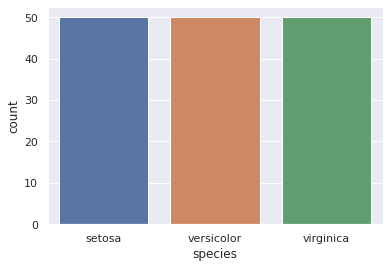

In [28]:
# Check whether target data is balance
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="species", data=df)

# Define Feature and Target

In [29]:
# Select all variables as features
col = ['sepal_length','sepal_width','petal_length','petal_width']
X = df.loc[:, col]

# To see target unique output
df.species.unique()
# Convert target output into integer
species_to_num = {'setosa': 0,'versicolor': 1,'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

# Make Classification using Linear SVC

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

# Scaling feature
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

from sklearn import svm
C = 1.0 #0.01
clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_std_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

# Cross Validation within Train Dataset

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

from sklearn.model_selection import cross_val_score
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Confusion Matrix:
[[38  1  0]
 [ 0 27 10]
 [ 0  2 42]]
Average Accuracy: 	 0.8917
Accuracy SD: 		 0.0990
Precision Score: 	 0.8987
Recall Score: 		 0.8917
F1 Score: 		 0.8901


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Cross Validation within Test Dataset

In [32]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  3  3]]
Precision Score: 	 0.8633
Recall Score: 		 0.8667
F1 Score: 		 0.8581
